In [38]:
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# output_notebook()

In [39]:
# scatter relation
p = figure(plot_width=800, plot_height=400)

In [40]:
# 비어있는 canvas만 만든상황
show(p)

In [41]:
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]
p.circle(x, y, size=10)
show(p)

In [6]:
# seaborn과 비교해보기 (내가 그냥 해본 것!)
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


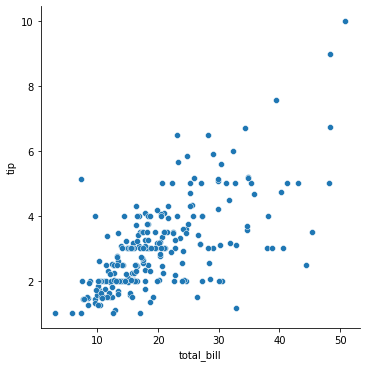

In [7]:
sns.relplot(x='total_bill', y='tip', data=tips)

In [8]:
p.circle(tips['total_bill'], tips['tip'], size=10)
show(p)

In [14]:
p.circle(x, y, size=10, line_color='orange', fill_color='brown')
show(p)

In [19]:
p.circle(x, y, size=30, line_color='orange', fill_color='blue')
show(p)

In [20]:
# canvas에 지금 그려진걸 삭제하는 방법없나?
show(p)

In [32]:
import pandas as pd
from bokeh.plotting import figure
df = pd.read_csv('AAPL.csv')
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800


In [36]:
df.index = pd.to_datetime(df['Date'])
df = df.drop('Date', axis=1)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800


In [46]:
print(bokeh.__version__)

1.0.4


In [49]:
p = figure(plot_width=700, plot_height=300, x_axis_type='datetime')
p.line(df.index, df['Close'], color='navy', alpha=0.5)
show(p)

In [45]:
import jinja2
from bokeh.embed import components
template = jinja2.Template('''
<html>
<link href='http://cdn.pydata.org/bokeh/release/bokeh-1.0.4.min.css' rel='stylesheet' type='text/css'>
<script src='http://cdn.pydata.org/bokeh.release/bokeh-1.0.4.min.js'></script>
<head><title>bokeh test</title>
</head>
<body>
<h1>This site for Bokeh Test</h1>

이 사이트는 보케를 테스트하기 위한 공간입니다.
{{script}}
{{div}}

</body>
</html>
'''
)

In [51]:
script, div = components(p)

In [53]:
# 제대로 동작하는지 확인?

from IPython.display import HTML
HTML(template.render(script=script, div=div))

In [56]:
with open('a.html', 'w') as f:
    f.write(template.render(script=script, div=div))

# 아무것도 안나오는데?
import webbrowser
webbrowser.open('a.html')

True